# File input 

In this notebook, we'll take a look at how to:  
a) import data from a file using numpy  
b) use numpy to manipulate data and extract useful information

In [1]:
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# numpy has its own format to save and load arrays to file
array1=np.array(((1,2), (3,4)))
print('array1=\n', array1, '\n')
np.save('array.npy', array1)

array2=np.load('array.npy')
print('array2=\n', array2)

array1=
 [[1 2]
 [3 4]] 

array2=
 [[1 2]
 [3 4]]


### np.loadtxt

To read in data from a file use np.loadtxt (or np.genfromtxt which gives a few more options)

    np.loadtxt(filename (required), (optional:) dtype, comments, delimiter, skiprows, usecols, unpack)


e.g. the Dublin Airport weather readings from weather.csv  
(in some cases, it may be more appropriate to use other packages, such as the dedicated csv library to import data)



In [12]:
day, month, year, min_temp, max_temp = np.loadtxt('weather.csv', delimiter=',', skiprows=1, usecols=(0, 1, 2, 3,4), unpack=True )
print (max_temp)

[ 9.7  9.9 11.2 ... 14.6 16.  18.3]


Note that:  
-- we skip the 1st row, which contains the column labels  
-- we use the *delimiter* argument to specify what separates different fields  
-- we use *unpack* so that the loadtxt function returns 5 variables, instead of just one  
-- all variables are presumed to be the same type, in this case floats. We can change this manually, as below:

In [13]:
day = day.astype(int)
month = month.astype(int)
year = year.astype(int)

### Numpy examples

Let's use some of the built in numpy functions to get useful information from the data set.  
If you are not sure how these work, search their documentation pages on the numpy website.  

<br>





In [14]:
print('The lowest temperature on record is', min_temp.min(), 'degrees Celsius')
print('The lowest temperature on record is', max_temp.max(), 'degrees Celsius')

The lowest temperature on record is -12.2 degrees Celsius
The lowest temperature on record is 28.7 degrees Celsius


It is often more convenient to work with lists of indices rather than data values.  
Functions that begin with 'arg' usually return an index or list of indices.  
e.g. argmax() returns the index where the array takes a maximum value.  
This can be useful for retrieving more information from arrays:


In [15]:
hottest_day = np.argmax(max_temp)
print('The minimum temperature on the warmest day was', min_temp[hottest_day], 'degrees Celsius')
print('The hottest date on record is %d / %d / %d' %( day[hottest_day], month[hottest_day], year[hottest_day]))

The minimum temperature on the warmest day was 13.3 degrees Celsius
The hottest date on record is 2 / 8 / 1990


In [16]:
days_by_temp = np.argsort(max_temp)
print('The second hottest day on record was in', int( year[days_by_temp[-2]]))

print('There were %d days between the first and second hottest days on record' % 
      ( np.abs(days_by_temp[-2] - days_by_temp[-1] )))

The second hottest day on record was in 1983
There were 2575 days between the first and second hottest days on record


np.where() is a useful tool to get lists of indices corresponding to more complicated conditions.  
In the example in the next cell, the condition '(month==1) & (year==1987)' by itself returns an array of True or False values.  
np.where() then returns the indices where this array is nonzero, i.e. True.  
We could write this instead as:

    ((month==1) & (year==1987) ).nonzero()


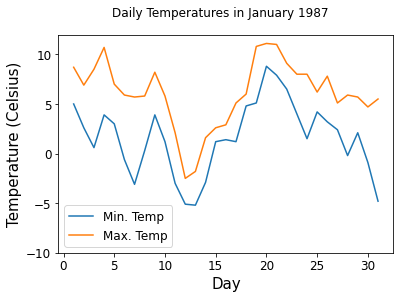

In [17]:
jan_1987= np.where((month==1) & (year==1987) )

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot( day[jan_1987], min_temp[jan_1987], label='Min. Temp')
ax.plot( day[jan_1987], max_temp[jan_1987], label='Max. Temp')

ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Temperature (Celsius)', fontsize=15)

ax.set_xticks(np.arange(0, 31, 5))
ax.tick_params(axis="x", labelsize=12)

ax.set_yticks(np.arange(-10, 11, 5))
ax.tick_params(axis="y", labelsize=12)

plt.suptitle('Daily Temperatures in January 1987')

plt.legend(fontsize =12)
plt.show()

np.savetxt() is the corresponding tool to save information to a file.

If you have multiple arrays of the same length to print as columns, the np.c_ tool is useful to combine them

In [9]:
col_a = [0, 1, 2, 3, 4]
col_b = [5, 6, 7, 8, 9]
col_c = [3, 6, 8, 1, 7]

In [10]:
np.c_[col_a, col_b, col_c]

array([[0, 5, 3],
       [1, 6, 6],
       [2, 7, 8],
       [3, 8, 1],
       [4, 9, 7]])

In [11]:
np.savetxt('saved_columns.dat', np.c_[col_a, col_b, col_c])